In [43]:
import math
import os
import pickle
from collections import Counter
from embeddings.embedding_utils import get_query_key, get_queries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data_queries = get_queries()
filename_to_query = {}
for category in data_queries.keys():
    for query in data_queries[category]:
        filename_to_query[f"{get_query_key(category, query)}.pkl"] = query


In [10]:
numerical_labels_all = []
files = os.listdir('.')
files.sort()
files = [file for file in files if file.endswith('.pkl')]
for file in files:
    with open(file, 'rb') as f:
        data_dict = pickle.load(f)
        numerical_labels_all.append(data_dict['numerical_labels'])


In [150]:
idf_dicts= []
for numerical_labels in numerical_labels_all:
    flatlist_labels = []
    for label_list in numerical_labels:
        flatlist_labels.extend(label_list)
    counter = Counter(flatlist_labels)
    n=len(numerical_labels)
    idf_dict = { key:math.pow(math.log2(n/val),1) for key, val in counter.items() }
    idf_dicts.append(idf_dict)

query_names = [filename_to_query[file] for file in files]

In [151]:
def simJ(label_list_1, label_list_2, idf_dict):
    intersection = set(label_list_1) & set(label_list_2)
    union = set(label_list_1) | set(label_list_2)
    return sum([idf_dict[l] for l in intersection])/sum([idf_dict[l] for l in union])

In [152]:
example_scores_all = []
sample_size= 100_000
for idf_dict, numerical_labels in zip(idf_dicts, numerical_labels_all):
    example_scores = []
    indices_i = np.random.randint(0, len(numerical_labels), sample_size)
    indices_j = np.random.randint(0, len(numerical_labels)-1, sample_size)
    indices_j = np.where(indices_j == indices_i, indices_j, len(numerical_labels)-1)

    for i,j in zip(indices_i, indices_j):
        example_scores.append(simJ(numerical_labels[i], numerical_labels[j], idf_dict))
    example_scores_all.append(example_scores)

In [153]:
# sort the scores
for example_scores in example_scores_all:
    example_scores.sort(reverse=True)

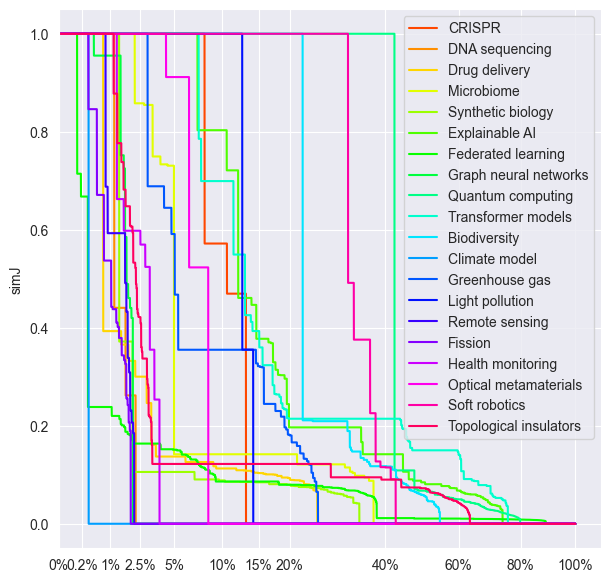

In [154]:
# plot example scores
plt.figure(figsize=(7,7))
colors = sns.color_palette("hsv", len(query_names))

for i, example_scores in enumerate(example_scores_all):
    if True:
        plt.plot(example_scores,
                 label=query_names[i],
                 color=colors[i])
plt.ylabel("simJ")
def forward(x):
    return np.sqrt(x)

def inverse(x):
    return np.power(x, 2)

plt.xscale('function', functions=(forward, inverse))
num_xticks=5
v_p_step = sample_size*0.05
plt.xticks([0,v_p_step/25,v_p_step/5,v_p_step/2,v_p_step,v_p_step*2,v_p_step*3]+list(np.arange(sample_size//num_xticks, sample_size+1, sample_size//num_xticks)), ["0%","0.2%","1%","2.5%","5%","10%","15%"]+[f"{int(n*100/num_xticks)}%" for n in range(1,num_xticks+1)])
#plt.xticks([])
plt.legend()
plt.savefig("simJ_distibution.png")
plt.show()

In [157]:
simJ(numerical_labels_all[11][37],numerical_labels_all[11][38],idf_dicts[11])

0.2000790833995639